In [1]:
# Import dependencies:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

# Part 1: Data Exploration

In [2]:
# Read data in train.csv file and store in a dataframe:

data = "Data/train.csv"
train_df = pd.read_csv(data)
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# Check which columns contain any missing values:

train_df.columns[train_df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [4]:
# Check the percentage of missing values in the columns that have missing values:

proportion_missing = train_df.isnull().sum()/len(train_df)
proportion_missing = proportion_missing[proportion_missing > 0]
proportion_missing.sort_values(inplace=True)
proportion_missing

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

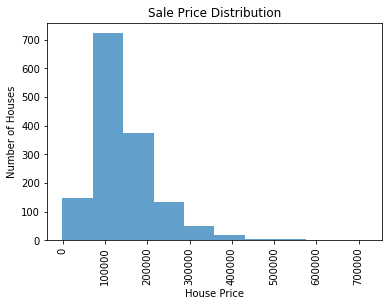

In [5]:
# Check the distribution of the sale prices (our target variable):

plt.hist(train_df.SalePrice, alpha=0.70, align="left")
plt.xlabel("House Price")
plt.ylabel("Number of Houses")
plt.xticks(rotation=90)
plt.title("Sale Price Distribution")
plt.show()

In [6]:
# Find quartiles of the sale price distribution:

sale_price = train_df["SalePrice"]

quartiles = sale_price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"Interquartile range: {iqr}")
print(f"Median: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Lower quartile: 129975.0
Upper quartile: 214000.0
Interquartile range: 84025.0
Median: 163000.0 
Values below 3937.5 could be outliers.
Values above 340037.5 could be outliers.


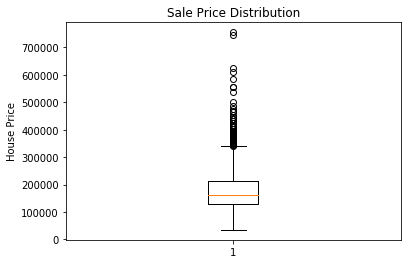

In [7]:
# Create a boxplot of the sale price distribution:

fig1, ax1 = plt.subplots()
ax1.set_title("Sale Price Distribution")
ax1.set_ylabel("House Price")
ax1.boxplot(sale_price)
plt.show()

In [8]:
# Separate data by categorical and numerical values:

numeric_data = train_df.select_dtypes(include=[np.number])
categorical_data = train_df.select_dtypes(exclude=[np.number])

print(f"Number of columns containing categorical data: {categorical_data.shape[1]}")
print(f"Number of columns containing numeric data: {numeric_data.shape[1]}")

Number of columns containing categorical data: 43
Number of columns containing numeric data: 38


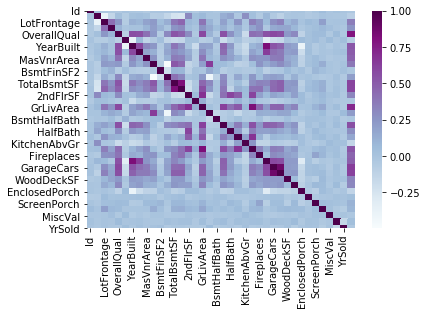

In [9]:
# For numeric data, create a correlation matrix that will help us visualize correlations between our features and target value:

corr = numeric_data.corr()
sns.heatmap(corr, cmap="BuPu")

In [10]:
# Print correlation values of the strongest positive correlations to the sale price:

print (corr['SalePrice'].sort_values(ascending=False)[:15], '\n')

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 



In [11]:
# Print correlation values of the strongest negative correlations to the sale price:

print (corr['SalePrice'].sort_values(ascending=False)[-10:])

BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


# Part 2: Data Preprocessing

In [12]:
# Import test.csv file and combine it with train.csv so that the dataset can be cleaned and encoded:

test_df = pd.read_csv("Data/test.csv")

combined_df = train_df.append(test_df)
combined_df

/Users/pierce/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,NaN,3,Twnhs,TA,No,0.0,0.0,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
1455,546,546,0,NaN,3,TwnhsE,TA,No,252.0,0.0,...,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
1456,1224,0,0,NaN,4,1Fam,TA,No,1224.0,0.0,...,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
1457,970,0,0,NaN,3,1Fam,TA,Av,337.0,0.0,...,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006


In [13]:
# Since data from the test dataset doesn't contain sale prices, replace each missing sale price with a value of "0":

combined_df["SalePrice"] = combined_df["SalePrice"].fillna(value=0)
combined_df

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,NaN,3,Twnhs,TA,No,0.0,0.0,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
1455,546,546,0,NaN,3,TwnhsE,TA,No,252.0,0.0,...,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
1456,1224,0,0,NaN,4,1Fam,TA,No,1224.0,0.0,...,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
1457,970,0,0,NaN,3,1Fam,TA,Av,337.0,0.0,...,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006


In [14]:
# Drop the 5 columns that contain the most missing values, as discovered in the data exploration phase:

combined_df = combined_df.drop(columns=["FireplaceQu", "Fence", "Alley", "MiscFeature", "PoolQC"])
combined_df

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,3,Twnhs,TA,No,0.0,0.0,Unf,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
1455,546,546,0,3,TwnhsE,TA,No,252.0,0.0,Rec,...,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
1456,1224,0,0,4,1Fam,TA,No,1224.0,0.0,ALQ,...,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
1457,970,0,0,3,1Fam,TA,Av,337.0,0.0,GLQ,...,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006


In [15]:
# Drop rows with missing values:

combined_df = combined_df.dropna()
combined_df

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1360,0,0,3,1Fam,TA,Av,119.0,344.0,Rec,...,WD,0,Pave,8,1104.0,AllPub,160,1969,1979,2006
1452,546,546,0,3,Twnhs,TA,No,408.0,0.0,Rec,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
1455,546,546,0,3,TwnhsE,TA,No,252.0,0.0,Rec,...,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
1456,1224,0,0,4,1Fam,TA,No,1224.0,0.0,ALQ,...,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006


In [16]:
combined_df.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fireplaces',
       'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id',
       'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea',
       'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass',
       'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SalePric

In [17]:
qual_dict = {np.nan: 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
#name = np.array(['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond'])
combined_df = combined_df.replace(qual_dict, regex=True)


In [18]:
combined_df["ExterCond"]

0       3
1       3
2       3
3       3
4       3
       ..
1451    3
1452    3
1455    3
1456    3
1458    3
Name: ExterCond, Length: 2202, dtype: int64

In [19]:
combined_df = combined_df.replace({np.nan: 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4})
combined_df["BsmtExposure"]

0       1
1       4
2       2
3       1
4       3
       ..
1451    3
1452    1
1455    1
1456    1
1458    3
Name: BsmtExposure, Length: 2202, dtype: object

In [20]:
# Write a function that uses label encoder to encode categorical features:

# le = LabelEncoder()
# def encode(df, var):
#       le.fit(df[var])
#       df[var] = le.transform(df[var])
#       return df

le = LabelEncoder()
def factorize(data, var, fill_na = None):
      if fill_na is not None:
            data[var].fillna(fill_na, inplace=True)
      le.fit(data[var])
      data[var] = le.transform(data[var])
      return data

In [21]:
# Use a boolean mask to extract columns consisting of categorical features:

#categorical_feature_mask = combined_df.dtypes == object
#categorical_cols = combined_df.columns[categorical_feature_mask].tolist()
#categorical_cols

In [22]:
# Run the label encoder on all columns that contain categorical values:

#le = LabelEncoder()
#combined_df[categorical_cols] = combined_df[categorical_cols].apply(lambda col: le.fit_transform(col))
#combined_df[categorical_cols]

In [23]:
# Use one hot encoder to transform categorical features:

#ohe = OneHotEncoder(categorical_cols, sparse=False ) 
#combined_df[categorical_cols] = combined_df[categorical_cols].apply(lambda col: ohe.fit_transform(col))
#combined_df[categorical_cols]

In [24]:
# creating instance of one-hot-encoder
#enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
#enc_df = pd.DataFrame(enc.fit_transform(combined_df[['MSZoning']]).toarray())
# merge with main df bridge_df on key values
#combined_df = combined_df.join(enc_df)
#combined_df

In [26]:
# qual_dict = {np.nan: 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
# name = np.array(['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond'])

# for i in name:
#      combined_df[i] = combined_df[i].map(qual_dict).astype(int)

# combined_df["BsmtExposure"] = combined_df["BsmtExposure"].map({np.nan: 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

# bsmt_fin_dict = {np.nan: 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
# combined_df["BsmtFinType1"] = combined_df["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
# combined_df["BsmtFinType2"] = combined_df["BsmtFinType2"].map(bsmt_fin_dict).astype(int)
# combined_df["Functional"] = combined_df["Functional"].map({np.nan: 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}).astype(int)

# combined_df["GarageFinish"] = combined_df["GarageFinish"].map({np.nan: 0, "Unf": 1, "RFn": 2, "Fin": 3}).astype(int)
# combined_df["Fence"] = combined_df["Fence"].map({np.nan: 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}).astype(int)

# #encoding data
# combined_df["CentralAir"] = (combined_df["CentralAir"] == "Y") * 1.0
# varst = np.array(['MSSubClass','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Foundation','SaleCondition'])

# for x in varst:
#          factorize(combined_df, x)

# #encode variables and impute missing values
# combined_df = factorize(combined_df, "MSZoning", "RL")
# combined_df = factorize(combined_df, "Exterior1st", "Other")
# combined_df = factorize(combined_df, "Exterior2nd", "Other")
# combined_df = factorize(combined_df, "MasVnrType", "None")
# combined_df = factorize(combined_df, "SaleType", "Oth")

In [27]:
combined_df = pd.get_dummies(combined_df, prefix_sep='_', drop_first=True)
combined_df

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtQual,...,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave
0,856,854,0,3,3,706.0,0.0,1.0,0.0,4,...,0,0,0,0,0,0,0,0,1,1
1,1262,0,0,3,3,978.0,0.0,0.0,1.0,4,...,0,0,0,0,0,0,0,0,1,1
2,920,866,0,3,3,486.0,0.0,1.0,0.0,4,...,0,0,0,0,0,0,0,0,1,1
3,961,756,0,3,4,216.0,0.0,1.0,0.0,3,...,0,0,0,0,0,0,0,0,1,1
4,1145,1053,0,4,3,655.0,0.0,1.0,0.0,4,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1360,0,0,3,3,119.0,344.0,1.0,0.0,3,...,0,0,0,0,0,0,0,0,1,1
1452,546,546,0,3,3,408.0,0.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,1,1
1455,546,546,0,3,3,252.0,0.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,1,1
1456,1224,0,0,4,3,1224.0,0.0,1.0,0.0,3,...,0,0,0,0,0,0,0,0,1,1


In [28]:
X = combined_df.drop(columns = ["SalePrice","Id"])
Y = combined_df["SalePrice"]

In [29]:
rf = RandomForestRegressor()
rf = rf.fit(X, Y)
rf.score(X, Y)

/Users/pierce/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8307012987749092

In [30]:
srtd_fi = sorted(zip(rf.feature_importances_, X.columns), reverse=True)
srtd_fi

[(0.12143997926521918, 'GrLivArea'),
 (0.04985694257390623, 'TotalBsmtSF'),
 (0.04963303757041672, 'GarageArea'),
 (0.047331427385188134, 'LotArea'),
 (0.04721408584402674, 'OverallQual'),
 (0.046740427806301714, '2ndFlrSF'),
 (0.04660176282204773, 'BsmtFinSF1'),
 (0.044679831699956006, 'BsmtUnfSF'),
 (0.03878801253756932, '1stFlrSF'),
 (0.03718533546195511, 'MasVnrArea'),
 (0.03699160335420659, 'OpenPorchSF'),
 (0.032874128501567276, 'MoSold'),
 (0.031499664296000665, 'LotFrontage'),
 (0.030907337728490702, 'WoodDeckSF'),
 (0.028223246857301314, 'YearBuilt'),
 (0.026277346613057993, 'YearRemodAdd'),
 (0.025191328122665908, 'GarageYrBlt'),
 (0.012582994922204318, 'YrSold'),
 (0.009060630405053071, 'Fireplaces'),
 (0.008341915096687608, 'TotRmsAbvGrd'),
 (0.0067638828861971935, 'GarageFinish_RFn'),
 (0.006271788848063171, 'BsmtQual'),
 (0.005893452205936541, 'OverallCond'),
 (0.005863589274684507, 'SaleType_WD'),
 (0.0056967225685520765, 'ScreenPorch'),
 (0.005641577376203825, 'LandCont

In [32]:
# keep values above 0.01 
cols = []

for fi, column in srtd_fi: 
    if fi >= 0.01:
        cols.append(column)

cols

['GrLivArea',
 'TotalBsmtSF',
 'GarageArea',
 'LotArea',
 'OverallQual',
 '2ndFlrSF',
 'BsmtFinSF1',
 'BsmtUnfSF',
 '1stFlrSF',
 'MasVnrArea',
 'OpenPorchSF',
 'MoSold',
 'LotFrontage',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'YrSold']

In [34]:
combined_df = combined_df[cols]
combined_df

,GrLivArea,TotalBsmtSF,GarageArea,LotArea,OverallQual,2ndFlrSF,BsmtFinSF1,BsmtUnfSF,1stFlrSF,MasVnrArea,OpenPorchSF,MoSold,LotFrontage,WoodDeckSF,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,1710,856.0,548.0,8450,7,854,706.0,150.0,856,196.0,61,2,65.0,0,2003,2003,2003.0,2008
1,1262,1262.0,460.0,9600,6,0,978.0,284.0,1262,0.0,0,5,80.0,298,1976,1976,1976.0,2007
2,1786,920.0,608.0,11250,7,866,486.0,434.0,920,162.0,42,9,68.0,0,2001,2002,2001.0,2008
3,1717,756.0,642.0,9550,7,756,216.0,540.0,961,0.0,35,2,60.0,0,1915,1970,1998.0,2006
4,2198,1145.0,836.0,14260,8,1053,655.0,490.0,1145,350.0,84,12,84.0,192,2000,2000,2000.0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1360,1104.0,336.0,13384,5,0,119.0,641.0,1360,194.0,0,5,80.0,160,1969,1979,1969.0,2006
1452,1092,546.0,286.0,1533,4,546,408.0,138.0,546,0.0,0,12,21.0,0,1970,1970,1970.0,2006
1455,1092,546.0,286.0,1894,4,546,252.0,294.0,546,0.0,24,4,21.0,0,1970,1970,1970.0,2006
1456,1224,1224.0,576.0,20000,5,0,1224.0,0.0,1224,0.0,0,9,160.0,474,1960,1996,1960.0,2006


In [ ]:
(0.12143997926521918, 'GrLivArea'),
 (0.04985694257390623, 'TotalBsmtSF'),
 (0.04963303757041672, 'GarageArea'),
 (0.047331427385188134, 'LotArea'),
 (0.04721408584402674, 'OverallQual'),
 (0.046740427806301714, '2ndFlrSF'),
 (0.04660176282204773, 'BsmtFinSF1'),
 (0.044679831699956006, 'BsmtUnfSF'),
 (0.03878801253756932, '1stFlrSF'),
 (0.03718533546195511, 'MasVnrArea'),
 (0.03699160335420659, 'OpenPorchSF'),
 (0.032874128501567276, 'MoSold'),
 (0.031499664296000665, 'LotFrontage'),
 (0.030907337728490702, 'WoodDeckSF'),
 (0.028223246857301314, 'YearBuilt'),
 (0.026277346613057993, 'YearRemodAdd'),
 (0.025191328122665908, 'GarageYrBlt'),
 (0.012582994922204318, 'YrSold'),